<a href="https://colab.research.google.com/github/RoniAguilar/Tareas_EstadisticaAplicada_17/blob/main/VVAO_1855188_EstadisticaAplicadaG51_parcial1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PARCIAL 2

**Estadística Aplicada**

**Nombre: Verónica Vanessa Aguilar Ortiz**

**Matricula: 1855188**

**Grupo: 051**

**a) importa las librerías que siempre usamos, y las librerías usadas para 
series de tiempo, configura para que las graficas tengan el tamaño 
adecuado plt.rcParams['figure.figsize'] = [10, 7.5]**

In [ ]:
import numpy as np
import pandas as pd 
import yfinance as yf
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA

%matplotlib inline

In [ ]:
plt.rcParams['figure.figsize'] = [10, 7.5]

**b) importa los datos de Excel a tu notebook (primero sube tus datos a github 
y desde ahí llámalos) y despues realiza un grafica de este proceso ¿parece 
estacionario?**

In [ ]:
serie = pd.read_csv('https://raw.githubusercontent.com/RoniAguilar/Tareas_EstadisticaAplicada_17/main/proceso_desconocido.csv?token=GHSAT0AAAAAABSPEYJVZNQGVGPEZO7GI2RMYSA6MLQ' ,index_col='tiempo',parse_dates=True)

In [ ]:
serie.dropna(inplace=True)

In [ ]:
serie.head()

,proceso
tiempo,
1,1.404840
2,1.766445
3,1.713471
4,1.489008
5,1.894894


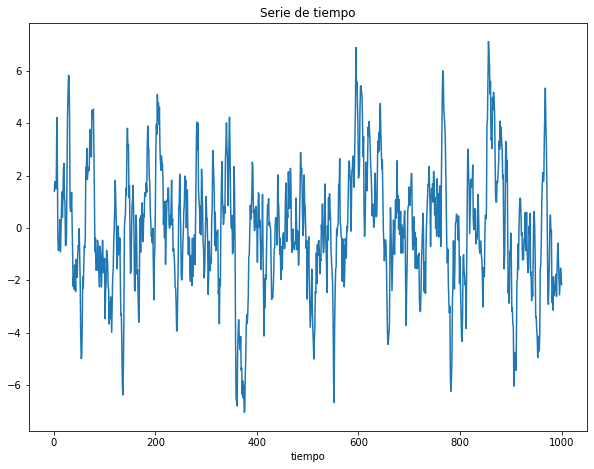

In [ ]:
serie.proceso.plot()
plt.title('Serie de tiempo')
plt.show()

R: Contestando la pregunta anterior, visualizando la grafica, si es una serie estacionaria

**c) realiza una prueba de raíz unitaria para verificar si este proceso es 
estacionario (sino es estacionario conviértelo en estacionario)**

In [ ]:
adf = adfuller(serie['proceso'])

print('p-value: %f' % adf[1])

p-value: 0.000000


Recuerda que $H_0$: serie no estacionaria

In [ ]:
if adf[1] < 0.05:
    
    print(f'con un un p-value={adf[1].round(3)}\n Se rechaza hipótesis nula, serie estacionaria') 
    
else:
    
    print(f'con un un p-value = {adf[1].round(3)}\n NO se rechaza hipótesis nula, serie no estacionaria') 

con un un p-value=0.0
 Se rechaza hipótesis nula, serie estacionaria


**d) realiza la gráfica de autocorrelación (ACF) y comenta como se interpreta**

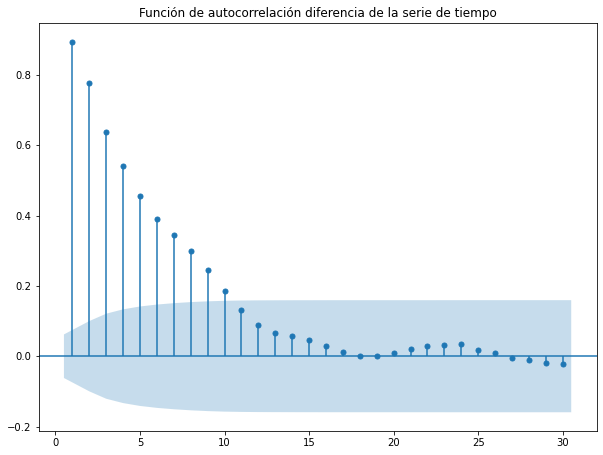

In [ ]:
#Grafica de autocorrelación ACF
plot_acf(serie, zero=False, lags=30)
plt.title('Función de autocorrelación diferencia de la serie de tiempo')
plt.show()

La grafica de autocorrelacion observamos que tiene un pico grande en el rezago 1 y va disminuyendo, constantemente.

**e) realiza la gráfica de autocorrelación parcial (PACF) y comenta como se 
interpreta**

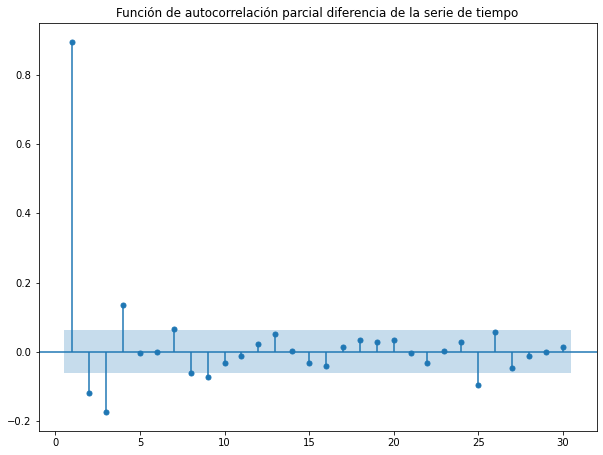

In [ ]:
#grafica de autocorrelación parcial PACF
plot_pacf(serie, zero=False, lags=30)
plt.title('Función de autocorrelación parcial diferencia de la serie de tiempo')
plt.show()

La grafica de autocorrelacion parcial tiene el primer rezago significativo seguido de correlaciones no significativas.

**f) señala que forma tiene el proceso ¿AR(p), MA(q), ARMA(p,q)? justifica tu 
respuesta con base en la ACF y PACF**

Visualizando la grafica de autocorrelacion y autocorrelacion parcial obserbamos un modelo ARMA, nuestro primer rezago en las dos graficas es significativo en 1, lo que nos da un modelo ARMA(1,1)

**g) Prueba distintas combinaciones del proceso hasta un ARMA (4,4)**

In [ ]:
ic = {}
for ar in range(7):
    for ma in range(7):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(serie, order=(ar, 0, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]

ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])
ic

AR: 0, MA: 0


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 0, MA: 1


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 0, MA: 2


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 0, MA: 3


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 0, MA: 4


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 0, MA: 5


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 0, MA: 6


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 1, MA: 0
AR: 1, MA: 1


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index 

AR: 1, MA: 2


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 1, MA: 3


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 1, MA: 4


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 1, MA: 5


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 1, MA: 6


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 2, MA: 0


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 2, MA: 1


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


AR: 2, MA: 2


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 2, MA: 3


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 2, MA: 4


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 2, MA: 5


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 2, MA: 6


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 3, MA: 0


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 3, MA: 1


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 3, MA: 2


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 3, MA: 3


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 3, MA: 4


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 3, MA: 5


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided

AR: 3, MA: 6
AR: 4, MA: 0


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 4, MA: 1


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 4, MA: 2


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 4, MA: 3


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 4, MA: 4


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 4, MA: 5


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided

AR: 4, MA: 6


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 5, MA: 0
AR: 5, MA: 1


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 5, MA: 2


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 5, MA: 3


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 5, MA: 4


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 5, MA: 5


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided

AR: 5, MA: 6


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 6, MA: 0
AR: 6, MA: 1


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 6, MA: 2


D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided

AR: 6, MA: 3


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 6, MA: 4


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 6, MA: 5


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


AR: 6, MA: 6


D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC          BIC
AR MA                          
0  0   4554.099799  4563.915309
   1   3776.529813  3791.253079
   2   3254.748875  3274.379896
   3   3099.641698  3124.180475
   4   3005.769303  3035.215835
   5   2940.448901  2974.803188
   6   2915.896082  2955.158124
1  0   2938.589816  2953.313082
   1   2930.944168  2950.575189
   2   2887.641199  2912.179975
   3   2881.833150  2911.279682
   4   2882.057379  2916.411666
   5   2883.471318  2922.733360
   6   2881.875444  2926.045241
2  0   2926.860056  2946.491077
   1   2939.730505  2964.269281
   2   2880.467875  2909.914407
   3   2882.245082  2916.599369
   4   2883.907745  2923.169787
   5   2884.477537  2928.647334
   6   2883.872032  2932.949584
3  0   2898.413337  2922.952113
   1   2887.691717  2917.138249
   2   2882.071937  2916.426224
   3   2883.152269  2922.414311
   4   2886.236630  2930.406427
   5   2870.861148  2919.938701
   6   2871.871042  2925.856350
4  0   2882.286082  2911.732614
   1   2884.280488  2918.634775
   2   2886.282014  2925.544056
   3   2884.797957  2928.967755
   4   2874.130854  2923.208407
   5   2872.128284  2926.113592
   6   2874.320810  2933.213874
5  0   2884.280507  2918.634794
   1   2885.459320  2924.721363
   2   2884.796725  2928.966522
   3   2886.797922  2935.875475
   4   2871.567074  2925.552382
   5   2880.985538  2939.878601
   6   2881.805758  2945.606576
6  0   2886.278700  2925.540742
   1   2886.688713  2930.858510
   2   2879.864039  2928.941592
   3   2882.250695  2936.236003
   4   2885.787150  2944.680213
   5   2887.944076  2951.744895
   6   2972.933432  3041.642006

In [ ]:
# estimamos un ARMA (1,1)
modelo = ARIMA(datos, order=(2, 0, 4))
resultado = modelo.fit()
resultado.summary()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                proceso   No. Observations:                 1000
Model:                 ARIMA(2, 0, 4)   Log Likelihood               -1433.954
Date:                Sun, 27 Mar 2022   AIC                           2883.908
Time:                        17:35:21   BIC                           2923.170
Sample:                             0   HQIC                          2898.830
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0967      0.257     -0.376      0.707      -0.601       0.407
ar.L1          0.6915      0.714      0.969      0.333      -0.707       2.090
ar.L2          0.1148      0.610      0.188      0.851      -1.081       1.311
ma.L1          0.3154      0.713      0.442      0.658      -1.082       1.713
ma.L2          0.2504      0.118      2.119      0.034       0.019       0.482
ma.L3         -0.0538      0.142     -0.378      0.706      -0.333       0.225
ma.L4          0.0389      0.094      0.414      0.679      -0.145       0.223
sigma2         1.0286      0.048     21.482      0.000       0.935       1.122
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.45
Prob(Q):                              0.99   Prob(JB):                         0.80
Heteroskedasticity (H):               1.01   Skew:                             0.01
Prob(H) (two-sided):                  0.93   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# estimamos un ARMA (1,2)
modelo = ARIMA(datos, order=(1, 0, 2))
resultado = modelo.fit()
resultado.summary()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                proceso   No. Observations:                 1000
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -1438.821
Date:                Sun, 27 Mar 2022   AIC                           2887.641
Time:                        17:35:45   BIC                           2912.180
Sample:                             0   HQIC                          2896.968
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0936      0.244     -0.384      0.701      -0.572       0.384
ar.L1          0.8085      0.024     34.170      0.000       0.762       0.855
ma.L1          0.2099      0.035      5.936      0.000       0.141       0.279
ma.L2          0.2419      0.035      6.986      0.000       0.174       0.310
sigma2         1.0387      0.048     21.614      0.000       0.945       1.133
===================================================================================
Ljung-Box (L1) (Q):                   0.24   Jarque-Bera (JB):                 0.54
Prob(Q):                              0.62   Prob(JB):                         0.76
Heteroskedasticity (H):               1.01   Skew:                             0.00
Prob(H) (two-sided):                  0.94   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# estimamos un ARMA (2,3)
modelo = ARIMA(datos, order=(2, 0, 3))
resultado = modelo.fit()
resultado.summary()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                proceso   No. Observations:                 1000
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -1434.123
Date:                Sun, 27 Mar 2022   AIC                           2882.245
Time:                        17:36:00   BIC                           2916.599
Sample:                             0   HQIC                          2895.302
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0970      0.263     -0.369      0.712      -0.612       0.418
ar.L1          0.5201      0.300      1.733      0.083      -0.068       1.108
ar.L2          0.2709      0.239      1.135      0.257      -0.197       0.739
ma.L1          0.4863      0.302      1.610      0.108      -0.106       1.078
ma.L2          0.2622      0.084      3.138      0.002       0.098       0.426
ma.L3         -0.0361      0.091     -0.397      0.691      -0.214       0.142
sigma2         1.0289      0.048     21.581      0.000       0.935       1.122
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.37
Prob(Q):                              0.99   Prob(JB):                         0.83
Heteroskedasticity (H):               1.01   Skew:                             0.00
Prob(H) (two-sided):                  0.94   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# estimamos un ARMA (3,2)
modelo = ARIMA(datos, order=(3, 0, 2))
resultado = modelo.fit()
resultado.summary()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                proceso   No. Observations:                 1000
Model:                 ARIMA(3, 0, 2)   Log Likelihood               -1434.036
Date:                Sun, 27 Mar 2022   AIC                           2882.072
Time:                        17:37:25   BIC                           2916.426
Sample:                             0   HQIC                          2895.129
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0977      0.265     -0.369      0.712      -0.616       0.421
ar.L1          0.3747      0.114      3.274      0.001       0.150       0.599
ar.L2          0.3069      0.123      2.502      0.012       0.066       0.547
ar.L3          0.0762      0.109      0.702      0.483      -0.137       0.289
ma.L1          0.6309      0.108      5.844      0.000       0.419       0.843
ma.L2          0.3688      0.111      3.326      0.001       0.151       0.586
sigma2         1.0288      0.048     21.638      0.000       0.936       1.122
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.35
Prob(Q):                              0.96   Prob(JB):                         0.84
Heteroskedasticity (H):               1.01   Skew:                             0.00
Prob(H) (two-sided):                  0.95   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# estimamos un ARMA (4,1)
modelo = ARIMA(datos, order=(4, 0, 1))
resultado = modelo.fit()
resultado.summary()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                proceso   No. Observations:                 1000
Model:                 ARIMA(4, 0, 1)   Log Likelihood               -1435.140
Date:                Sun, 27 Mar 2022   AIC                           2884.280
Time:                        17:37:51   BIC                           2918.635
Sample:                             0   HQIC                          2897.338
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0969      0.270     -0.359      0.719      -0.625       0.432
ar.L1          0.9858      0.238      4.146      0.000       0.520       1.452
ar.L2          0.0655      0.238      0.275      0.783      -0.401       0.532
ar.L3         -0.3033      0.045     -6.772      0.000      -0.391      -0.216
ar.L4          0.1310      0.051      2.556      0.011       0.031       0.231
ma.L1          0.0174      0.241      0.072      0.943      -0.454       0.489
sigma2         1.0311      0.048     21.615      0.000       0.938       1.125
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.37
Prob(Q):                              0.98   Prob(JB):                         0.83
Heteroskedasticity (H):               1.01   Skew:                             0.00
Prob(H) (two-sided):                  0.96   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# estimamos un ARMA (4,4)
modelo = ARIMA(datos, order=(4, 0, 4))
resultado = modelo.fit()
resultado.summary()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                proceso   No. Observations:                 1000
Model:                 ARIMA(4, 0, 4)   Log Likelihood               -1427.065
Date:                Sun, 27 Mar 2022   AIC                           2874.131
Time:                        17:38:08   BIC                           2923.208
Sample:                             0   HQIC                          2892.784
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0993      0.254     -0.391      0.696      -0.598       0.399
ar.L1          1.4774      0.122     12.133      0.000       1.239       1.716
ar.L2         -0.9466      0.246     -3.849      0.000      -1.429      -0.465
ar.L3         -0.0932      0.236     -0.396      0.692      -0.555       0.369
ar.L4          0.3593      0.102      3.533      0.000       0.160       0.559
ma.L1         -0.4744      0.119     -3.980      0.000      -0.708      -0.241
ma.L2          0.5434      0.133      4.072      0.000       0.282       0.805
ma.L3          0.2951      0.111      2.651      0.008       0.077       0.513
ma.L4          0.2561      0.039      6.558      0.000       0.180       0.333
sigma2         1.0142      0.047     21.552      0.000       0.922       1.106
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.44
Prob(Q):                              0.87   Prob(JB):                         0.80
Heteroskedasticity (H):               1.02   Skew:                             0.02
Prob(H) (two-sided):                  0.87   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**h) Elige dos modelos: el que tiene mejor Criterio de Akaike (AIC), y el que 
tiene mejor Criterio bayesiano de información (BIC)**

**Criterio bayesiano de información (BIC)**

In [ ]:
ic.sort_values('BIC', ascending = True)

AIC          BIC
AR MA                          
2  2   2880.467875  2909.914407
1  3   2881.833150  2911.279682
4  0   2882.286082  2911.732614
1  2   2887.641199  2912.179975
   4   2882.057379  2916.411666
3  2   2882.071937  2916.426224
2  3   2882.245082  2916.599369
3  1   2887.691717  2917.138249
4  1   2884.280488  2918.634775
5  0   2884.280507  2918.634794
3  5   2870.861148  2919.938701
   3   2883.152269  2922.414311
1  5   2883.471318  2922.733360
3  0   2898.413337  2922.952113
2  4   2883.907745  2923.169787
4  4   2874.130854  2923.208407
5  1   2885.459320  2924.721363
6  0   2886.278700  2925.540742
4  2   2886.282014  2925.544056
5  4   2871.567074  2925.552382
3  6   2871.871042  2925.856350
1  6   2881.875444  2926.045241
4  5   2872.128284  2926.113592
2  5   2884.477537  2928.647334
6  2   2879.864039  2928.941592
5  2   2884.796725  2928.966522
4  3   2884.797957  2928.967755
3  4   2886.236630  2930.406427
6  1   2886.688713  2930.858510
2  6   2883.872032  2932.949584
4  6   2874.320810  2933.213874
5  3   2886.797922  2935.875475
6  3   2882.250695  2936.236003
5  5   2880.985538  2939.878601
6  4   2885.787150  2944.680213
5  6   2881.805758  2945.606576
2  0   2926.860056  2946.491077
1  1   2930.944168  2950.575189
6  5   2887.944076  2951.744895
1  0   2938.589816  2953.313082
0  6   2915.896082  2955.158124
2  1   2939.730505  2964.269281
0  5   2940.448901  2974.803188
   4   3005.769303  3035.215835
6  6   2972.933432  3041.642006
0  3   3099.641698  3124.180475
   2   3254.748875  3274.379896
   1   3776.529813  3791.253079
   0   4554.099799  4563.915309

**Criterio de Akaike (AIC)**

In [ ]:
ic.sort_values('AIC', ascending = True)

AIC          BIC
AR MA                          
3  5   2870.861148  2919.938701
5  4   2871.567074  2925.552382
3  6   2871.871042  2925.856350
4  5   2872.128284  2926.113592
   4   2874.130854  2923.208407
   6   2874.320810  2933.213874
6  2   2879.864039  2928.941592
2  2   2880.467875  2909.914407
5  5   2880.985538  2939.878601
   6   2881.805758  2945.606576
1  3   2881.833150  2911.279682
   6   2881.875444  2926.045241
   4   2882.057379  2916.411666
3  2   2882.071937  2916.426224
2  3   2882.245082  2916.599369
6  3   2882.250695  2936.236003
4  0   2882.286082  2911.732614
3  3   2883.152269  2922.414311
1  5   2883.471318  2922.733360
2  6   2883.872032  2932.949584
   4   2883.907745  2923.169787
4  1   2884.280488  2918.634775
5  0   2884.280507  2918.634794
2  5   2884.477537  2928.647334
5  2   2884.796725  2928.966522
4  3   2884.797957  2928.967755
5  1   2885.459320  2924.721363
6  4   2885.787150  2944.680213
3  4   2886.236630  2930.406427
6  0   2886.278700  2925.540742
4  2   2886.282014  2925.544056
6  1   2886.688713  2930.858510
5  3   2886.797922  2935.875475
1  2   2887.641199  2912.179975
3  1   2887.691717  2917.138249
6  5   2887.944076  2951.744895
3  0   2898.413337  2922.952113
0  6   2915.896082  2955.158124
2  0   2926.860056  2946.491077
1  1   2930.944168  2950.575189
   0   2938.589816  2953.313082
2  1   2939.730505  2964.269281
0  5   2940.448901  2974.803188
6  6   2972.933432  3041.642006
0  4   3005.769303  3035.215835
   3   3099.641698  3124.180475
   2   3254.748875  3274.379896
   1   3776.529813  3791.253079
   0   4554.099799  4563.915309

In [ ]:
# estimamos un ARMA (2,2)
modelo1 = ARIMA(serie, order=(2, 0, 2))
resultado1 = modelo1.fit()
resultado1.summary()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                proceso   No. Observations:                 1000
Model:                 ARIMA(2, 0, 2)   Log Likelihood               -1434.234
Date:                Sun, 27 Mar 2022   AIC                           2880.468
Time:                        19:51:04   BIC                           2909.914
Sample:                             0   HQIC                          2891.660
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0958      0.259     -0.370      0.711      -0.603       0.411
ar.L1          0.4274      0.110      3.901      0.000       0.213       0.642
ar.L2          0.3408      0.100      3.406      0.001       0.145       0.537
ma.L1          0.5802      0.106      5.461      0.000       0.372       0.788
ma.L2          0.2907      0.035      8.417      0.000       0.223       0.358
sigma2         1.0292      0.048     21.657      0.000       0.936       1.122
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.41
Prob(Q):                              0.98   Prob(JB):                         0.81
Heteroskedasticity (H):               1.01   Skew:                             0.01
Prob(H) (two-sided):                  0.94   Kurtosis:                         2.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# estimamos un ARMA (3,5)
modelo2 = ARIMA(datos, order=(3, 0, 5))
resultado2 = modelo2.fit()
resultado2.summary()

D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
D:\Anaconda\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                proceso   No. Observations:                 1000
Model:                 ARIMA(3, 0, 5)   Log Likelihood               -1425.431
Date:                Sun, 27 Mar 2022   AIC                           2870.861
Time:                        19:51:13   BIC                           2919.939
Sample:                             0   HQIC                          2889.514
                               - 1000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0968      0.280     -0.346      0.730      -0.646       0.452
ar.L1          1.9749      0.057     34.710      0.000       1.863       2.086
ar.L2         -1.8498      0.080    -23.051      0.000      -2.007      -1.693
ar.L3          0.7751      0.042     18.285      0.000       0.692       0.858
ma.L1         -0.9737      0.066    -14.705      0.000      -1.104      -0.844
ma.L2          0.9303      0.054     17.209      0.000       0.824       1.036
ma.L3         -0.2068      0.058     -3.563      0.000      -0.321      -0.093
ma.L4          0.2943      0.046      6.461      0.000       0.205       0.384
ma.L5         -0.1657      0.040     -4.133      0.000      -0.244      -0.087
sigma2         1.0109      0.046     21.740      0.000       0.920       1.102
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 0.22
Prob(Q):                              0.91   Prob(JB):                         0.90
Heteroskedasticity (H):               1.02   Skew:                             0.02
Prob(H) (two-sided):                  0.89   Kurtosis:                         2.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**El que tiene mejor Criterio de Akaike (AIC): ARMA (2,2)**

**El que tiene mejor Criterio bayesiano de información (BIC): ARMA (3,5)**

**i) Para ambos modelos calcula las siguientes medidas: MAPE, MAD, y MSD
(no uses ninguna función predefinida de Python, es decir, tú tienes que 
construir el cálculo), nota que primero tienes que pronosticar la serie con 
cada modelo. Realiza un data frame para cada pronóstico y ahí realiza los 
cálculos de MAPE, MAD y MSD.**

ARMA(2,2)

In [ ]:
serie['pronostico1'] =resultado1.predict()

In [ ]:
MAPE1 = 0
MAD1 = 0
MSD1 = 0

for t in range (1,1000):
   MAPE1 = MAPE1 + abs(((serie.at[t,'proceso'] - serie.at [t,'pronostico1'])/serie.at[t,'proceso']))
   MAD1 = MAD1 + abs((serie.at[t,'proceso'] - serie.at [t,'pronostico1']))
   MSD1 = MSD1 + abs((serie.at[t,'proceso'] - serie.at [t,'pronostico1'])**2)

MAPE1 = MAPE1/1000
MAD1 = MAD1/1000
MSD1 = MSD1/1000

print(f' El valor de la medida MAPE para el modelo ARMA(2,2) : {MAPE1}')
print(f' El valor de la medida MAD para el modelo ARMA(2,2) : {MAD1}')
print(f' El valor de la medida MSD para el modelo ARMA(2,2) : {MSD1}')

 El valor de la medida MAPE para el modelo ARMA(2,2) : 2.9902162096185303
 El valor de la medida MAD para el modelo ARMA(2,2) : 0.8142100848795458
 El valor de la medida MSD para el modelo ARMA(2,2) : 1.0307159432180917


In [ ]:
serie['pronostico2'] =resultado2.predict()

ARMA(3,5)

In [ ]:
MAPE2 = 0
MAD2 = 0
MSD2 = 0

for t in range (1,1000):
   MAPE2 = MAPE2 + abs(((serie.at[t,'proceso'] - serie.at [t,'pronostico2'])/serie.at[t,'proceso']))
   MAD2 = MAD2 + abs((serie.at[t,'proceso'] - serie.at [t,'pronostico2']))
   MSD2 = MSD2 + abs((serie.at[t,'proceso'] - serie.at [t,'pronostico2'])**2)

MAPE2 = MAPE2/1000
MAD2 = MAD2/1000
MSD2 = MSD2/1000

print(f' El valor de la medida MAPE para el modelo ARMA(2,2) : {MAPE2}')
print(f' El valor de la medida MAD para el modelo ARMA(2,2) : {MAD2}')
print(f' El valor de la medida MSD para el modelo ARMA(2,2) : {MSD2}')

 El valor de la medida MAPE para el modelo ARMA(2,2) : 3.036514136617618
 El valor de la medida MAD para el modelo ARMA(2,2) : 0.806164876067441
 El valor de la medida MSD para el modelo ARMA(2,2) : 1.0127957988529088


**j) De ambos modelos, elige el que tenga menor valor en al menos en dos 
de las tres medidas (MAPE, MAD, MSD)**


R: Tenemos que en el modelo ARMA(3,5) tenemos menor valor en las medidas MAD y MSD, por lo tanto escogemos ese modelo.

**k) Señala cual es el modelo elegido**

R: El modelo elegido es el ARMA(3,5) 

**l) Grafica la serie original y el pronóstico del modelo elegido elegido**

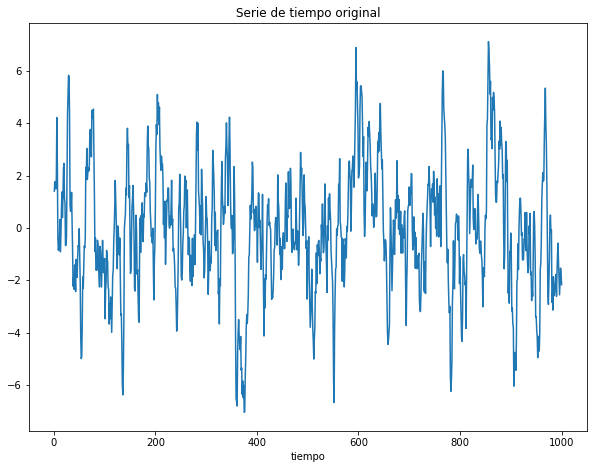

In [ ]:
serie.proceso.plot()
plt.title('Serie de tiempo original')
plt.show()

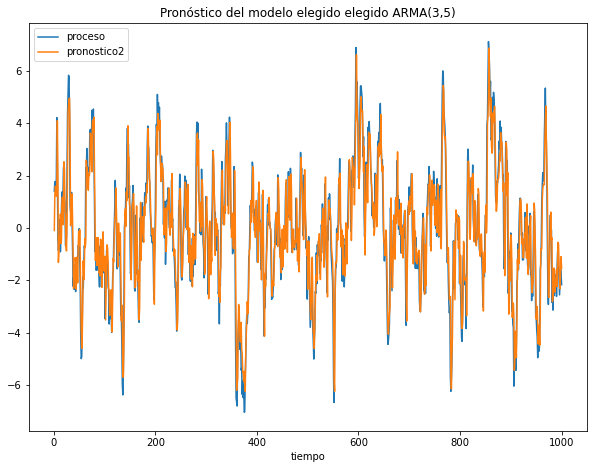

In [ ]:
#Graficamos el pronostico
serie[['proceso', 'pronostico2']].plot()
plt.title('Pronóstico del modelo elegido elegido ARMA(3,5)')
plt.show()